In [1]:
import pysam
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# ignore this notebook!!!
# It just contains some preliminary analysis. 
# all the real analysis is in frequency_spectrum_cleaned and random_real_data_stats

In [3]:
RATIO = 0
REP = 1
CONC = "high"

In [11]:
path = glob.glob(f"../data/ww_dump/plate_validation/A{RATIO}_rep{REP}_{CONC}conc/*conc_wuhan.sorted.bam")[0]
samfile = pysam.AlignmentFile(path, "rb")

In [12]:
myiterator = samfile.pileup(until_eof=True)

In [13]:
data = next(myiterator)

In [14]:
data.pileups

In [15]:
cov = samfile.count_coverage(samfile.references[0], 0, 30000)

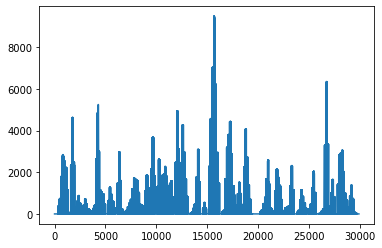

In [16]:
plt.plot(cov[0])

In [17]:
samfile.get_reference_length(samfile.references[0])

29903

In [117]:
iterator = samfile.fetch(samfile.references[0], 2273, 2274)#5375, 5379)


site1 = 2285 #5375
site2 = 2355 #5378
site3 = 2247
site4 = 2249
site1list = []
site2list = []
site3list = []
site4list = []

for read in iterator:
    if len(read.seq) <= site2 - read.pos - 1 or read.pos != 2181:
        continue
    else:
        print(read.seq[site3 - read.pos - 1], 
              read.seq[site4 - read.pos - 1], 
              read.seq[site1 - read.pos - 1], 
              read.seq[site2 - read.pos - 1])
        
        site1list.append(read.seq[site1 - read.pos - 1])
        site2list.append(read.seq[site2 - read.pos - 1])
        site3list.append(read.seq[site3 - read.pos - 1])
        site4list.append(read.seq[site4 - read.pos - 1])

G G A G
G G G A
T T T T
G G A G
G G A G
G G A G
G G A G
T T T T
T T T T
T T T T
G G A G
G G G A
G G G A
G G A G
T T T T
G G G A
G G G A
G G G A
T T T T
G G G A
G G G A
T T T T
G G A G
G G A G
G G G A
G G A G
G G A G
G G A G
G G G A
G G G A
T T T T
G G G A
T T T T
G G G A
G G G A
G G G A
G G A G
T T T T
T T T T
G G G A
G G A G
T T T T
T T T T
G G G A
T T T T
G G G A
G G A G
T T T T
T T T T
G G G A
G G A G
G G G A
G G G A
G G A G
G G G A
G G G A
G G G A
T T T T
G G A G
T T T T
G G A G
T T T T
T T T T
T T T T
G G G A
T T T T
G G A G
G G A G
T T T T
G G G A
T T T T
G G G A
T T T T
G G A G
G G A G
G G A G
T T T T
T T T T
G G G A
G G G A
G G A G
G G A G
G G G A
G G A G
T T T T
T T T T
T T T T
T T T T
T T T T
G G A G
G G G A
T T T T
G G G A
G G A G
T T T T
G G G A
G G G A
G G A G
G G G A
T T T T
G G A G
T T T T
T T T T
T T T T
G G A G
G G A G
T T T T
G G G A
T T T T
G G G A
T T T T
G G A G
G G A G
T T T T
G G A G
G G A G
T T T T
G G G A
T T T T
G G A G
T T T T
T T T T
G G A G
G G A G
G G A G


In [108]:
df = pd.DataFrame(
    np.array([site1list, site2list, site3list, site4list]).T, 
    columns=["site1", "site2", "site3", "site4"])

In [114]:
df

,site1,site2,site3,site4
0,A,G,G,G
1,G,A,G,G
2,T,T,T,T
3,A,G,G,G
4,A,G,G,G
...,...,...,...,...
425,G,A,G,G
426,A,G,G,G
427,A,G,G,G
428,G,A,G,G


In [106]:
#oneread = next(iterator)
#print(len(oneread.seq))
#print(site2 - oneread.pos - 1)

In [105]:
#oneread.pos

In [116]:
pd.crosstab(df["site1"], [site2list, site3list, site4list], colnames=["site2", "site3", "site4"])

site2    A       G     T     
site3    G  T    G  T  G    T
site4    G  G    G  A  G    T
site1                        
A        0  0  140  0  0    0
G      130  1    0  0  1    0
T        0  0    0  1  0  157